<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Pandas: Data Visualization
</p>
</div>

Data Science Cohort Live NYC Nov 2023
<p>Phase 1</p>
<br>
<br>

<div align = "right">
<img src="Images/flatiron-school-logo.png" align = "right" width="200"/>
</div>
    

#### Pandas in-built visualization toolset
- Very handy for quick plotting of data in DataFrames and Series.
- High level interface to matplotlib.
- Support for a variety of plots:
    - Line plots
    -Scatter plots
    - Histograms
    - Bar plots
    - Box plots
    - ...

In [44]:
import matplotlib.pyplot as plt # visualization library
import numpy as np
import pandas as pd

from collections import Counter

#### Styling a Plot

Most styling options controlled by matplotlib.

- Background color
- Line style
- Color maps
- Overall style themes

Let's take a look at available themes: plt.style.available

In [2]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In order to select a style:

In [3]:
plt.style.use('ggplot') # this is the default style that R uses

Create our own dataset quick:

- Generates 365 normally distributed random numbers.
- Setting a seed means that "random" sample will be the same on every execution.
- Create a datetime index that spans an entire year.

In [4]:
np.random.seed(777) # pseudo-random seed. 

data = pd.DataFrame({'A':np.random.randn(365).cumsum(),
                    'B':np.random.randn(365).cumsum() + 25,
                    'C':np.random.randn(365).cumsum() - 25}, 
                     index = pd.date_range('1/1/2018', periods = 365))
data.head()

,A,B,C
2018-01-01,-0.468209,25.435990,-22.997943
2018-01-02,-1.291034,26.479220,-22.673404
2018-01-03,-1.356414,25.832356,-21.669027
2018-01-04,-2.069776,26.456703,-21.408310
2018-01-05,-1.163425,25.864281,-22.685208


Creating a line plot of A, B, and C vs the date:

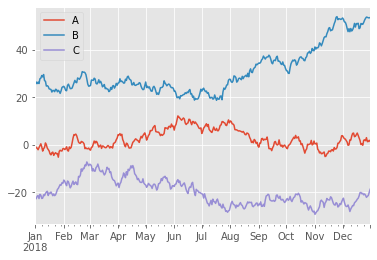

In [5]:
data.plot()
plt.show()

#### Scatter Plots
- Make plot of (x,y) data points
- x comes from one column
- y comes from another column

In [8]:
iris_data = pd.read_csv('Data/Iris.csv')

In [12]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [15]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


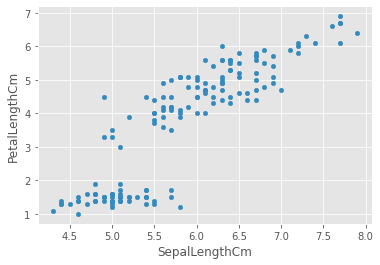

In [16]:
iris_data.plot(x = 'SepalLengthCm', y = 'PetalLengthCm', kind = 'scatter') # calling type of plot in .plot() args
plt.show()

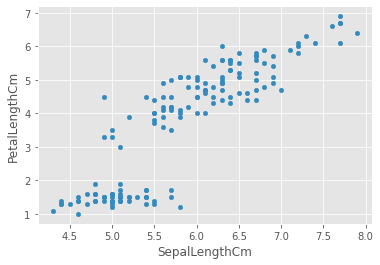

In [18]:
# can also use the .plot.scatter(...) to call scatter directly

iris_data.plot.scatter(x = 'SepalLengthCm', y = 'PetalLengthCm')
plt.show()

Sometimes it's useful to have a color map on the data points.

A potential use case is:

Representing surface ocean temperatures sampled at various locations:

- x = x-coordinate
- y = y-coordinate
- color = temperature on surface

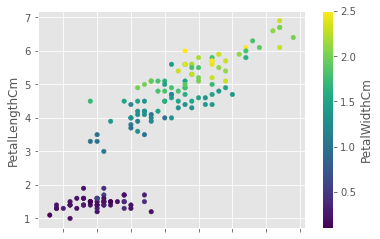

In [29]:
iris_data.plot.scatter(x = 'SepalLengthCm', y = 'PetalLengthCm', c = 'PetalWidthCm', colormap = 'viridis')
plt.show()

A complete list of colormaps is available in the Official Matplotlib Documentation.

Pandas plots are matplotlib objects. Can use matplotlib commands to modify plots:

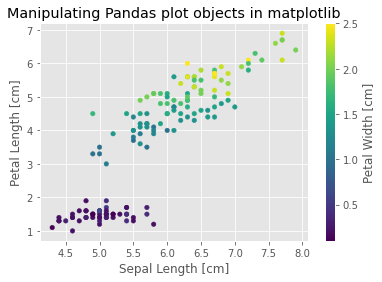

In [30]:
fig, ax = plt.subplots()

iris_data.plot.scatter(x = 'SepalLengthCm', y = 'PetalLengthCm', c = 'PetalWidthCm', colormap = 'viridis', ax = ax)
ax.set_title('Manipulating Pandas plot objects in matplotlib')
ax.set_xlabel('Sepal Length [cm]')
ax.set_ylabel('Petal Length [cm]')

f = plt.gcf()

color_ax = f.get_axes()[1]

color_ax.set_ylabel('Petal Width [cm]')

plt.show()

#### Some Other Plots

The histogram:
- typically used a Series method
- bins: sets the number of bins
- alpha: opacity level
- hist_type: sets style
    

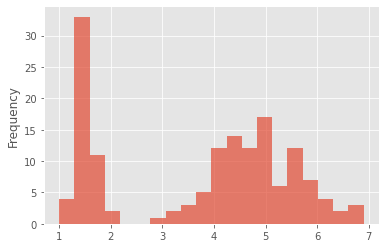

In [33]:
iris_data['PetalLengthCm'].plot.hist(bins = 20, alpha = 0.7);

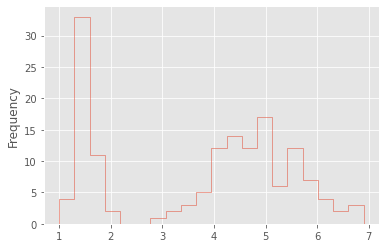

In [67]:
iris_data['PetalLengthCm'].plot.hist(bins = 20, histtype='step'); 

Looking at distribution of petal lengths by species:
- pandas logical filtering
- in-built pandas plotting methods

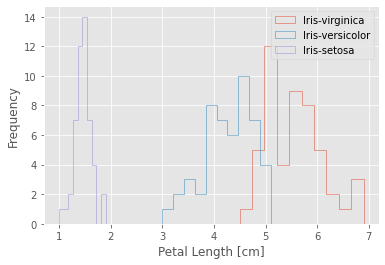

In [71]:
fig,ax = plt.subplots()
for species in set(iris_data['Species']):
    iris_data.loc[iris_data['Species'] == species, 'PetalLengthCm'].plot.hist(bins = 10, histtype='step',
                                                                              label = species, ax = ax);
plt.xlabel('Petal Length [cm]')
plt.legend()
plt.show()    

There will be better ways to do this.

Can also use as a DataFrame method to plot histograms of multiple series:

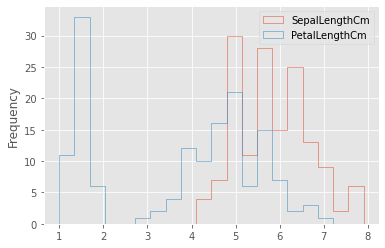

In [70]:
iris_data[['SepalLengthCm','PetalLengthCm']].plot.hist(bins = 20,histtype='step'); 

The barplot:
- can be used similarly as a Series or DataFrame method
- here for a simple countplot

In [52]:
count_species = pd.Series(Counter(iris_data['Species']))
count_species

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

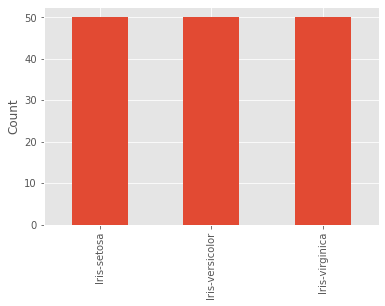

In [54]:
count_species.plot.bar()
plt.ylabel('Count')
plt.show()

Remember: Pandas plotting is for quick and dirty visualization.

- For more complete statistical EDA typically use Seaborn (future lecture)
- Will want to be able to calculate statistics over groupings